In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from FDcoeffs import *

In [2]:
bf_h=np.load("BF_hess_9pfd.npy")[:,1,1,2,2]
co_h=np.load("CO_hess_9pfd.npy")[:,1,1,2,2]
nn_h=np.load("NN_hess_9pfd.npy")[:,1,1,2,2]
ch4_h=np.load("Ch4_hess_9pfd.npy")[:,1,1,2,2]
bf_ge=np.load("BF_g_elec_9pfd.npy")[:,1,2]
co_ge=np.load("CO_g_elec_9pfd.npy")[:,1,2]
nn_ge=np.load("NN_g_elec_9pfd.npy")[:,1,2]
ch4_ge=np.load("Ch4_g_elec_9pfd.npy")[:,1,2]
bf_g=np.load("BF_grads_9pfd.npy")[:,1,2]
co_g=np.load("CO_grads_9pfd.npy")[:,1,2]
nn_g=np.load("NN_grads_9pfd.npy")[:,1,2]
ch4_g=np.load("Ch4_grads_9pfd.npy")[:,1,2]
bf_ad=np.load("BF_aderivs_9pfd.npy")[:,1,2]
co_ad=np.load("CO_aderivs_9pfd.npy")[:,1,2]
nn_ad=np.load("NN_aderivs_9pfd.npy")[:,1,2]
ch4_ad=np.load("Ch4_aderivs_9pfd.npy")[:,1,2]

In [3]:
alt=pd.read_pickle("alch_transf_mol")

In [4]:
alt

,alchemy,and1,and2,ge,grad,hess
0,CO@BF,-0.722169,0.180542,8.926402,0.260371,0.530560
1,CO@NN,-0.000000,0.246563,11.714076,-0.120964,1.948852
2,BF@CO,0.461071,0.230536,10.106888,-0.267220,1.509271
3,NN@CO,-0.461071,0.230536,11.417116,0.120866,1.543511


In [5]:
g_nh4,gn_nh4,h_nh4= 0.05345959300967906, -1.8955982396089313, 0.303604669017256     #@CO
g_bh4,gn_bh4,h_bh4= -0.09009562209189137, -1.4168246843330305, 0.4029575636155609  #@CO

In [6]:
and1nh4=-1/2.043854241378284**2
and1bh4=1/2.043854241378284**2

In [7]:
dl=.1
print("2 order finite diff. accuracy:: ",np.sum(fd1_2*co_ge)/dl)
print("4 order finite diff. accuracy:: ",np.sum(fd1_4*co_ge)/dl)
print("6 order finite diff. accuracy:: ",np.sum(fd1_6*co_ge)/dl)
print("Analytical derivative        :: ",co_ad[4])

2 order finite diff. accuracy::  0.6853093549406797
4 order finite diff. accuracy::  0.6856325634051341
6 order finite diff. accuracy::  0.6856337746187879
Analytical derivative        ::  0.6856271189686727


In [8]:
dl=.1
print("2 order finite diff. accuracy:: ",np.sum(fd1_2*bf_ge)/dl)
print("4 order finite diff. accuracy:: ",np.sum(fd1_4*bf_ge)/dl)
print("6 order finite diff. accuracy:: ",np.sum(fd1_6*bf_ge)/dl)
print("Analytical derivative        :: ",bf_ad[4])

2 order finite diff. accuracy::  0.9886821829764614
4 order finite diff. accuracy::  0.9889465000337161
6 order finite diff. accuracy::  0.988946087275373
Analytical derivative        ::  0.9889466777049154


In [9]:
dl=.1
print("2 order finite diff. accuracy:: ",np.sum(fd1_2*ch4_ge)/dl)
print("4 order finite diff. accuracy:: ",np.sum(fd1_4*ch4_ge)/dl)
print("6 order finite diff. accuracy:: ",np.sum(fd1_6*ch4_ge)/dl)
print("Analytical derivative        :: ",ch4_ad[4])

2 order finite diff. accuracy::  0.3182340784545745
4 order finite diff. accuracy::  0.31830656870640905
6 order finite diff. accuracy::  0.31830665780282485
Analytical derivative        ::  0.31830614343267605


In [10]:
alt[alt.alchemy=="NN@CO"]

,alchemy,and1,and2,ge,grad,hess
3,NN@CO,-0.461071,0.230536,11.417116,0.120866,1.543511


In [11]:
1/2.08272**2,2/2.08272**2

(0.23053571945076823, 0.46107143890153646)

In [12]:
dl=.1

In [13]:
aaff_predict=[]
tgdf=alt[alt.alchemy=="BF@CO"]
aaff_predict.append(co_g[4])
aaff_predict.append(aaff_predict[0]+float(tgdf.and1)-co_ad[4])
aaff_predict.append(aaff_predict[1]+float(tgdf.and2)+np.sum(fd1_8*co_ad)/dl/2)
aaff_predict.append(aaff_predict[2]-np.sum(fd2_8*co_ad)/dl**2/6)
aaff_predict.append(aaff_predict[3]+np.sum(fd3_6*co_ad)/dl**3/24 )
aaff_predict.append(aaff_predict[4]-np.sum(fd4_6*co_ad)/dl**4/120)
aaff_predict.append(aaff_predict[5]+np.sum(fd5_4*co_ad)/dl**5/720)
aaff_predict.append(aaff_predict[6]-np.sum(fd6_4*co_ad)/dl**6/5040)
re_co_bf=(np.asarray(aaff_predict)-float(tgdf.grad))/float(tgdf.grad)
np.asarray(aaff_predict),(np.asarray(aaff_predict)-float(tgdf.grad))/float(tgdf.grad)

(array([ 2.68246151e-06, -2.24552998e-01, -3.03578803e-01, -2.71268282e-01,
        -2.64739601e-01, -2.66555025e-01, -2.67363937e-01, -2.67795573e-01]),
 array([-1.00001004e+00, -1.59668689e-01,  1.36064878e-01,  1.51511364e-02,
        -9.28075790e-03, -2.48700346e-03,  5.40139084e-04,  2.15542566e-03]))

In [14]:
aaff_predict=[]
tgdf=alt[alt.alchemy=="NN@CO"]
aaff_predict.append(co_g[4])
aaff_predict.append(aaff_predict[0]+float(tgdf.and1)+co_ad[4])
aaff_predict.append(aaff_predict[1]+float(tgdf.and2)+np.sum(fd1_8*co_ad)/dl/2)
aaff_predict.append(aaff_predict[2]+np.sum(fd2_8*co_ad)/dl**2/6)
aaff_predict.append(aaff_predict[3]+np.sum(fd3_6*co_ad)/dl**3/24 )
aaff_predict.append(aaff_predict[4]+np.sum(fd4_6*co_ad)/dl**4/120)
aaff_predict.append(aaff_predict[5]+np.sum(fd5_4*co_ad)/dl**5/720)
aaff_predict.append(aaff_predict[6]+np.sum(fd6_4*co_ad)/dl**6/5040)
re_co_nn=(np.asarray(aaff_predict)-float(tgdf.grad))/float(tgdf.grad)
np.asarray(aaff_predict),(np.asarray(aaff_predict)-float(tgdf.grad))/float(tgdf.grad)

(array([2.68246151e-06, 2.24558363e-01, 1.45532557e-01, 1.13222035e-01,
        1.19750716e-01, 1.21566140e-01, 1.20757229e-01, 1.21188865e-01]),
 array([-9.99977806e-01,  8.57914827e-01,  2.04083838e-01, -6.32417553e-02,
        -9.22580514e-03,  5.79436058e-03, -8.98283819e-04,  2.67291857e-03]))

In [15]:
aaff_predict=[]
tgdf=alt[alt.alchemy=="CO@BF"]
aaff_predict.append(bf_g[4])
aaff_predict.append(aaff_predict[0]+float(tgdf.and1)+bf_ad[4])
aaff_predict.append(aaff_predict[1]+float(tgdf.and2)+np.sum(fd1_8*bf_ad)/dl/2)
aaff_predict.append(aaff_predict[2]+np.sum(fd2_8*bf_ad)/dl**2/6)
aaff_predict.append(aaff_predict[3]+np.sum(fd3_6*bf_ad)/dl**3/24 )
aaff_predict.append(aaff_predict[4]+np.sum(fd4_6*bf_ad)/dl**4/120)
aaff_predict.append(aaff_predict[5]+np.sum(fd5_4*bf_ad)/dl**5/720)
aaff_predict.append(aaff_predict[6]+np.sum(fd6_4*bf_ad)/dl**6/5040)
re_bf_co=(np.asarray(aaff_predict)-float(tgdf.grad))/float(tgdf.grad)
np.asarray(aaff_predict),(np.asarray(aaff_predict)-float(tgdf.grad))/float(tgdf.grad),float(tgdf.grad)

(array([-8.97145753e-07,  2.66776572e-01,  2.91375688e-01,  2.64998026e-01,
         2.60449012e-01,  2.59321200e-01,  2.59811430e-01,  2.60471171e-01]),
 array([-1.00000345e+00,  2.46012916e-02,  1.19078425e-01,  1.77704812e-02,
         2.99211426e-04, -4.03234645e-03, -2.14953404e-03,  3.84316597e-04]),
 0.26037110642298167)

In [16]:
aaff_predict=[]
tgdf=alt[alt.alchemy=="CO@NN"]
aaff_predict.append(nn_g[4])
aaff_predict.append(aaff_predict[0]+float(tgdf.and1)+nn_ad[4])
aaff_predict.append(aaff_predict[1]+float(tgdf.and2)+np.sum(fd1_8*nn_ad)/dl/2)
aaff_predict.append(aaff_predict[2]+np.sum(fd2_8*nn_ad)/dl**2/6)
aaff_predict.append(aaff_predict[3]+np.sum(fd3_6*nn_ad)/dl**3/24 )
aaff_predict.append(aaff_predict[4]+np.sum(fd4_6*nn_ad)/dl**4/120)
aaff_predict.append(aaff_predict[5]+np.sum(fd5_4*nn_ad)/dl**5/720)
aaff_predict.append(aaff_predict[6]+np.sum(fd6_4*nn_ad)/dl**6/5040)
re_nn_co=(np.asarray(aaff_predict)-float(tgdf.grad))/float(tgdf.grad)
np.asarray(aaff_predict),(np.asarray(aaff_predict)-float(tgdf.grad))/float(tgdf.grad),float(tgdf.grad)

(array([-8.83731442e-06, -8.83731417e-06, -1.29066486e-01, -1.29066486e-01,
        -1.21061840e-01, -1.21061840e-01, -1.20884756e-01, -1.20884756e-01]),
 array([-9.99926943e-01, -9.99926943e-01,  6.69796299e-02,  6.69796299e-02,
         8.06022953e-04,  8.06022814e-04, -6.57909482e-04, -6.57908284e-04]),
 -0.12096433956903496)

In [17]:
dl=.1
aaff_predict=[]    # CH4->NH4
aaff_predict.append(ch4_g[4])
aaff_predict.append(aaff_predict[0]+ch4_ad[4]+and1nh4)
aaff_predict.append(aaff_predict[1]+np.sum(fd1_8*ch4_ad)/dl/2)
aaff_predict.append(aaff_predict[2]+np.sum(fd2_8*ch4_ad)/dl**2/6)
aaff_predict.append(aaff_predict[3]+np.sum(fd3_6*ch4_ad)/dl**3/24 )
aaff_predict.append(aaff_predict[4]+np.sum(fd4_6*ch4_ad)/dl**4/120)
aaff_predict.append(aaff_predict[5]+np.sum(fd5_4*ch4_ad)/dl**5/720)
aaff_predict.append(aaff_predict[6]+np.sum(fd6_4*ch4_ad)/dl**6/5040)
re_ch4_nh4=(np.asarray(aaff_predict)-g_nh4)/g_nh4
np.asarray(aaff_predict),re_ch4_nh4,(g_nh4)

(array([-8.74635893e-07,  7.89184912e-02,  5.98863889e-02,  5.26404577e-02,
         5.33795623e-02,  5.35009837e-02,  5.35028228e-02,  5.33404050e-02]),
 array([-1.00001636e+00,  4.76226935e-01,  1.20217823e-01, -1.53225131e-02,
        -1.49703094e-03,  7.74242226e-04,  8.08643979e-04, -2.22949786e-03]),
 0.05345959300967906)

In [18]:
dl=.1
aaff_predict=[]    # CH4->BH4
aaff_predict.append(ch4_g[4])
aaff_predict.append(aaff_predict[0]-ch4_ad[4]+and1bh4)
aaff_predict.append(aaff_predict[1]+np.sum(fd1_8*ch4_ad)/dl/2)
aaff_predict.append(aaff_predict[2]-np.sum(fd2_8*ch4_ad)/dl**2/6)
aaff_predict.append(aaff_predict[3]+np.sum(fd3_6*ch4_ad)/dl**3/24 )
aaff_predict.append(aaff_predict[4]-np.sum(fd4_6*ch4_ad)/dl**4/120)
aaff_predict.append(aaff_predict[5]+np.sum(fd5_4*ch4_ad)/dl**5/720)
aaff_predict.append(aaff_predict[6]-np.sum(fd6_4*ch4_ad)/dl**6/5040)
re_ch4_bh4=(np.asarray(aaff_predict)-g_bh4)/g_bh4
np.asarray(aaff_predict),re_ch4_bh4,(g_bh4)

(array([-8.74635893e-07, -7.89202404e-02, -9.79523427e-02, -9.07064115e-02,
        -8.99673068e-02, -9.00887282e-02, -9.00868891e-02, -8.99244712e-02]),
 array([-9.99990292e-01, -1.24039120e-01,  8.72042438e-02,  6.77934586e-03,
        -1.42421203e-03, -7.65179201e-05, -9.69307179e-05, -1.89965789e-03]),
 -0.09009562209189137)

In [19]:
and1bh4

0.23938677763795033

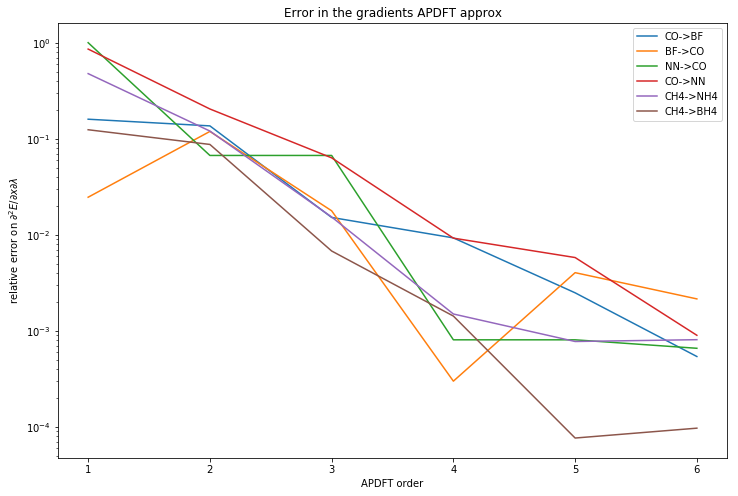

In [21]:
plt.figure(figsize=(12,8))
plt.plot(range(1,7),abs(re_co_bf[1:7]),label="CO->BF")
#plt.scatter(range(1,7),abs(re_co_bf[1:7]))
plt.plot(range(1,7),abs(re_bf_co[1:7]),label="BF->CO")
#plt.scatter(range(1,7),abs(re_bf_co[1:7]))
plt.plot(range(1,7),abs(re_nn_co[1:7]),label="NN->CO")
#plt.scatter(range(1,7),abs(re_nn_co[1:7]))
plt.plot(range(1,7),abs(re_co_nn[1:7]),label="CO->NN")
#plt.scatter(range(1,7),abs(re_co_nn[1:7]))
plt.plot(range(1,7),abs(re_ch4_nh4[1:7]),label="CH4->NH4")
plt.plot(range(1,7),abs(re_ch4_bh4[1:7]),label="CH4->BH4")

plt.title("Error in the gradients APDFT approx")
plt.yscale("log")
plt.xlabel("APDFT order")
plt.ylabel("relative error on $\partial^2 E/\partial x \partial \lambda $")
plt.legend()
plt.axhline(0,ls='--',color='black')
plt.savefig("error_gradients.jpg")

# Taylor expansion of the Hessian

In [22]:
aaff_predict=[]
tgdf=alt[alt.alchemy=="CO@BF"]
aaff_predict.append(bf_h[4])
aaff_predict.append(aaff_predict[0]+np.sum(fd1_8*bf_h)/dl)
aaff_predict.append(aaff_predict[1]+np.sum(fd2_8*bf_h)/dl**2/2)
aaff_predict.append(aaff_predict[2]+np.sum(fd3_6*bf_h)/dl**3/6)
aaff_predict.append(aaff_predict[3]+np.sum(fd4_6*bf_h)/dl**4/24 )
aaff_predict.append(aaff_predict[4]+np.sum(fd5_4*bf_h)/dl**5/120)
aaff_predict.append(aaff_predict[5]+np.sum(fd6_4*bf_h)/dl**6/720)
Hre_bf_co=(np.asarray(aaff_predict)-float(tgdf.hess))/float(tgdf.hess)
np.asarray(aaff_predict),Hre_bf_co,(float(tgdf.hess))

(array([0.59158882, 0.53805448, 0.51945078, 0.52179234, 0.53187596,
        0.53510163, 0.53146649]),
 array([ 0.11502811,  0.01412645, -0.02093784, -0.01652447,  0.00248116,
         0.00856092,  0.0017094 ]),
 0.5305595553353983)

In [23]:
aaff_predict=[]
tgdf=alt[alt.alchemy=="BF@CO"]
aaff_predict.append(co_h[4])
aaff_predict.append(aaff_predict[0]-np.sum(fd1_8*co_h)/dl)
aaff_predict.append(aaff_predict[1]+np.sum(fd2_8*co_h)/dl**2/2)
aaff_predict.append(aaff_predict[2]-np.sum(fd3_6*co_h)/dl**3/6)
aaff_predict.append(aaff_predict[3]+np.sum(fd4_6*co_h)/dl**4/24 )
aaff_predict.append(aaff_predict[4]-np.sum(fd5_4*co_h)/dl**5/120)
aaff_predict.append(aaff_predict[5]+np.sum(fd6_4*co_h)/dl**6/720)
Hre_co_bf=(np.asarray(aaff_predict)-float(tgdf.hess))/float(tgdf.hess)
np.asarray(aaff_predict),Hre_co_bf,(float(tgdf.hess))

(array([1.53201985, 1.51033636, 1.50373795, 1.51011403, 1.51628373,
        1.51680753, 1.47088628]),
 array([ 0.01507263,  0.00070577, -0.00366615,  0.00055846,  0.00464633,
         0.00499338, -0.02543273]),
 1.5092711646428913)

In [24]:
aaff_predict=[]
tgdf=alt[alt.alchemy=="NN@CO"]
aaff_predict.append(co_h[4])
aaff_predict.append(aaff_predict[0]+np.sum(fd1_8*co_h)/dl)
aaff_predict.append(aaff_predict[1]+np.sum(fd2_8*co_h)/dl**2/2)
aaff_predict.append(aaff_predict[2]+np.sum(fd3_6*co_h)/dl**3/6)
aaff_predict.append(aaff_predict[3]+np.sum(fd4_4*co_h)/dl**4/24 )
aaff_predict.append(aaff_predict[4]+np.sum(fd5_4*co_h)/dl**5/120)
aaff_predict.append(aaff_predict[5]+np.sum(fd6_2*co_h)/dl**6/720)
Hre_co_nn=(np.asarray(aaff_predict)-float(tgdf.hess))/float(tgdf.hess)
np.asarray(aaff_predict),Hre_co_nn,(float(tgdf.hess))

(array([1.53201985, 1.55370335, 1.54710494, 1.54072886, 1.54617095,
        1.54564716, 1.52051489]),
 array([-0.00744482,  0.00660335,  0.00232841, -0.00180248,  0.00172331,
         0.00138395, -0.01489858]),
 1.543511010105048)

In [25]:
aaff_predict=[]
tgdf=alt[alt.alchemy=="CO@NN"]
aaff_predict.append(nn_h[4])
aaff_predict.append(aaff_predict[0]+np.sum(fd1_8*nn_h)/dl)
aaff_predict.append(aaff_predict[1]+np.sum(fd2_8*nn_h)/dl**2/2)
aaff_predict.append(aaff_predict[2]+np.sum(fd3_6*nn_h)/dl**3/6)
aaff_predict.append(aaff_predict[3]+np.sum(fd4_4*nn_h)/dl**4/24 )
aaff_predict.append(aaff_predict[4]+np.sum(fd5_4*nn_h)/dl**5/120)
aaff_predict.append(aaff_predict[5]+np.sum(fd6_2*nn_h)/dl**6/720)
Hre_nn_co=(np.asarray(aaff_predict)-float(tgdf.hess))/float(tgdf.hess)
np.asarray(aaff_predict),Hre_nn_co,(float(tgdf.hess))

(array([1.97525265, 1.97525265, 1.94815711, 1.94815711, 1.94827187,
        1.94827188, 1.94897577]),
 array([ 1.35465747e-02,  1.35465747e-02, -3.56754513e-04, -3.56754861e-04,
        -2.97872004e-04, -2.97866426e-04,  6.33191289e-05]),
 1.9488523744271173)

In [26]:
aaff_predict=[]  #CH4->NH4
aaff_predict.append(ch4_h[4])
aaff_predict.append(aaff_predict[0]+np.sum(fd1_8*ch4_h)/dl)
aaff_predict.append(aaff_predict[1]+np.sum(fd2_8*ch4_h)/dl**2/2)
aaff_predict.append(aaff_predict[2]+np.sum(fd3_6*ch4_h)/dl**3/6)
aaff_predict.append(aaff_predict[3]+np.sum(fd4_4*ch4_h)/dl**4/24 )
aaff_predict.append(aaff_predict[4]+np.sum(fd5_4*ch4_h)/dl**5/120)
aaff_predict.append(aaff_predict[5]+np.sum(fd6_2*ch4_h)/dl**6/720)
Hre_ch4_nh4=(np.asarray(aaff_predict)-h_nh4)/h_nh4
np.asarray(aaff_predict),Hre_ch4_nh4,h_nh4

(array([0.36877375, 0.3193461 , 0.30399471, 0.30353933, 0.30328694,
        0.30324506, 0.30396367]),
 array([ 0.2146511 ,  0.05184846,  0.0012847 , -0.0002152 , -0.00104652,
        -0.00118448,  0.00118248]),
 0.303604669017256)

In [27]:
aaff_predict=[]   #CH4->BH4
aaff_predict.append(ch4_h[4])
aaff_predict.append(aaff_predict[0]-np.sum(fd1_8*ch4_h)/dl)
aaff_predict.append(aaff_predict[1]+np.sum(fd2_8*ch4_h)/dl**2/2)
aaff_predict.append(aaff_predict[2]-np.sum(fd3_6*ch4_h)/dl**3/6)
aaff_predict.append(aaff_predict[3]+np.sum(fd4_4*ch4_h)/dl**4/24 )
aaff_predict.append(aaff_predict[4]-np.sum(fd5_4*ch4_h)/dl**5/120)
aaff_predict.append(aaff_predict[5]+np.sum(fd6_2*ch4_h)/dl**6/720)
Hre_ch4_bh4=(np.asarray(aaff_predict)-h_bh4)/h_bh4
np.asarray(aaff_predict),Hre_ch4_bh4,h_bh4

(array([0.36877375, 0.41820139, 0.40284999, 0.40330537, 0.40305298,
        0.40309486, 0.40381348]),
 array([-0.0848323 ,  0.03782985, -0.00026695,  0.00086313,  0.00023678,
         0.00034073,  0.00212409]),
 0.4029575636155609)

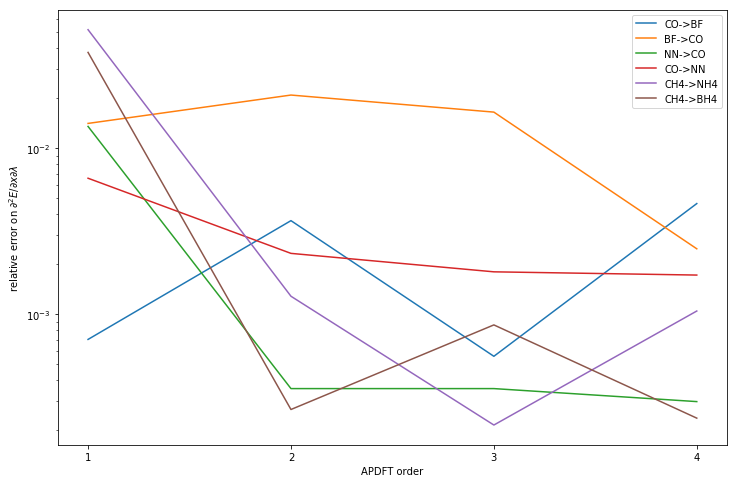

In [29]:
plt.figure(figsize=(12,8))
plt.plot(range(1,5),abs(Hre_co_bf[1:5]),label="CO->BF")
plt.plot(range(1,5),abs(Hre_bf_co[1:5]),label="BF->CO")
plt.plot(range(1,5),abs(Hre_nn_co[1:5]),label="NN->CO")
plt.plot(range(1,5),abs(Hre_co_nn[1:5]),label="CO->NN")
plt.plot(range(1,5),abs(Hre_ch4_nh4[1:5]),label="CH4->NH4")
plt.plot(range(1,5),abs(Hre_ch4_bh4[1:5]),label="CH4->BH4")

plt.yscale("log")
plt.xlabel("APDFT order")
plt.xticks([1,2,3,4])
plt.ylabel("relative error on $\partial^2 E/\partial x \partial \lambda $")
plt.legend()
plt.axhline(0,ls='--',color='black')

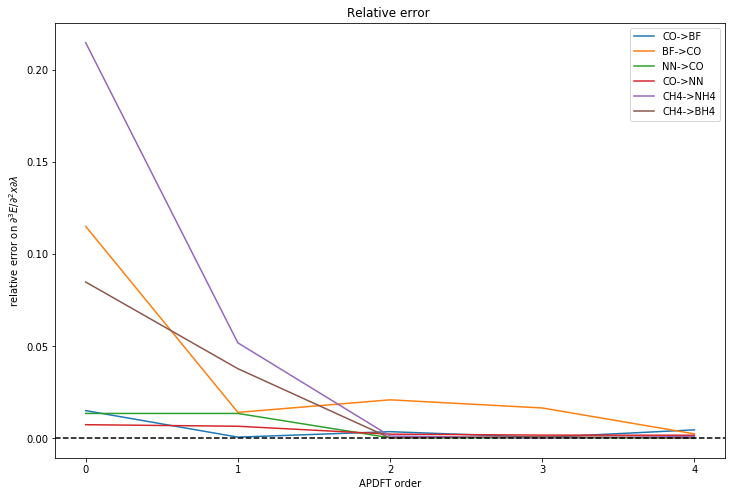

In [30]:
plt.figure(figsize=(12,8))
plt.plot(range(5),abs(Hre_co_bf[:5]),label="CO->BF")
plt.plot(range(5),abs(Hre_bf_co[:5]),label="BF->CO")
plt.plot(range(5),abs(Hre_nn_co[:5]),label="NN->CO")
plt.plot(range(5),abs(Hre_co_nn[:5]),label="CO->NN")
plt.plot(range(5),abs(Hre_ch4_nh4[:5]),label="CH4->NH4")
plt.plot(range(5),abs(Hre_ch4_bh4[:5]),label="CH4->BH4")

#plt.yscale("log")
plt.xlabel("APDFT order")
plt.xticks([0,1,2,3,4])
plt.title("Relative error ")
plt.ylabel("relative error on $\partial^3 E/\partial^2 x \partial \lambda $")
plt.legend()
plt.axhline(0,ls='--',color='black')

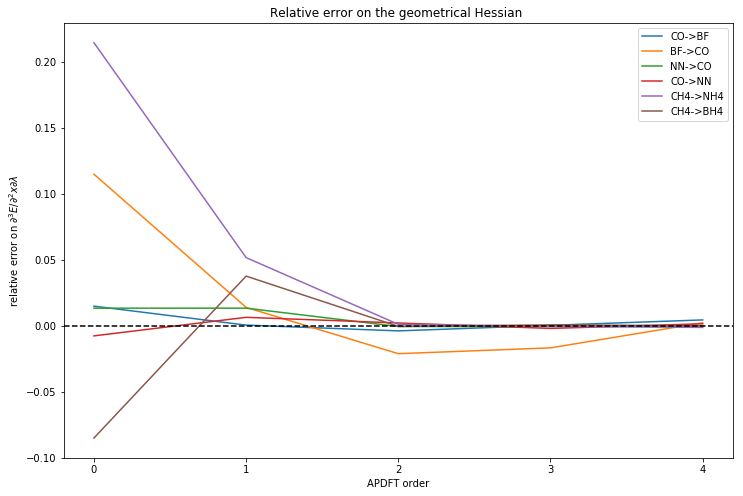

In [31]:
plt.figure(figsize=(12,8))
plt.plot(range(5),Hre_co_bf[:5],label="CO->BF")
plt.plot(range(5),Hre_bf_co[:5],label="BF->CO")
plt.plot(range(5),Hre_nn_co[:5],label="NN->CO")
plt.plot(range(5),Hre_co_nn[:5],label="CO->NN")
plt.plot(range(5),Hre_ch4_nh4[:5],label="CH4->NH4")
plt.plot(range(5),Hre_ch4_bh4[:5],label="CH4->BH4")

#plt.yscale("log")
plt.xlabel("APDFT order")
plt.xticks([0,1,2,3,4])
plt.title("Relative error on the geometrical Hessian ")
plt.ylabel("relative error on $\partial^3 E/\partial^2 x \partial \lambda $")
plt.legend()
plt.axhline(0,ls='--',color='black')
plt.savefig("error_hessians.jpg")